<a href="https://colab.research.google.com/github/Habib-human/Sternritter/blob/main/Breastcancerprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting breast cancer and comparing different machine learning models

#**Install lazypredict to predict which model works best**

In [2]:
!pip install lazypredict

     |████████████████████████████████| 248 kB 5.3 MB/s 
     |████████████████████████████████| 1.2 MB 46.6 MB/s 
     |████████████████████████████████| 302 kB 62.9 MB/s 
     |████████████████████████████████| 269 kB 62.6 MB/s 
     |████████████████████████████████| 14.5 MB 8.1 kB/s 
     |████████████████████████████████| 127.6 MB 20 kB/s 
     |████████████████████████████████| 10.1 MB 22.1 MB/s 
     |████████████████████████████████| 72 kB 889 kB/s 
     |████████████████████████████████| 6.8 MB 20.6 MB/s 
     |████████████████████████████████| 25.9 MB 1.1 kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44635 sha256=3007aa94fe71c6d06eb9751016dca959c981113840a8815bbe98a5bcc3c15f63
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully un

#**Install libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
import os 
warnings.filterwarnings("ignore")
import datetime
import lazypredict

##**load data**

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [4]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.drop('Unnamed: 32', axis = 1, inplace = True)
data

id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0      842302         M  ...          0.4601                  0.11890
1      842517         M  ...          0.2750                  0.08902
2    84300903         M  ...          0.3613                  0.08758
3    84348301         M  ...          0.6638                  0.17300
4    84358402         M  ...          0.2364                  0.07678
..        ...       ...  ...             ...                      ...
564    926424         M  ...          0.2060                  0.07115
565    926682         M  ...          0.2572                  0.06637
566    926954         M  ...          0.2218                  0.07820
567    927241         M  ...          0.4087                  0.12400
568     92751         B  ...          0.2871                  0.07039

[569 rows x 32 columns]

##**visualization**

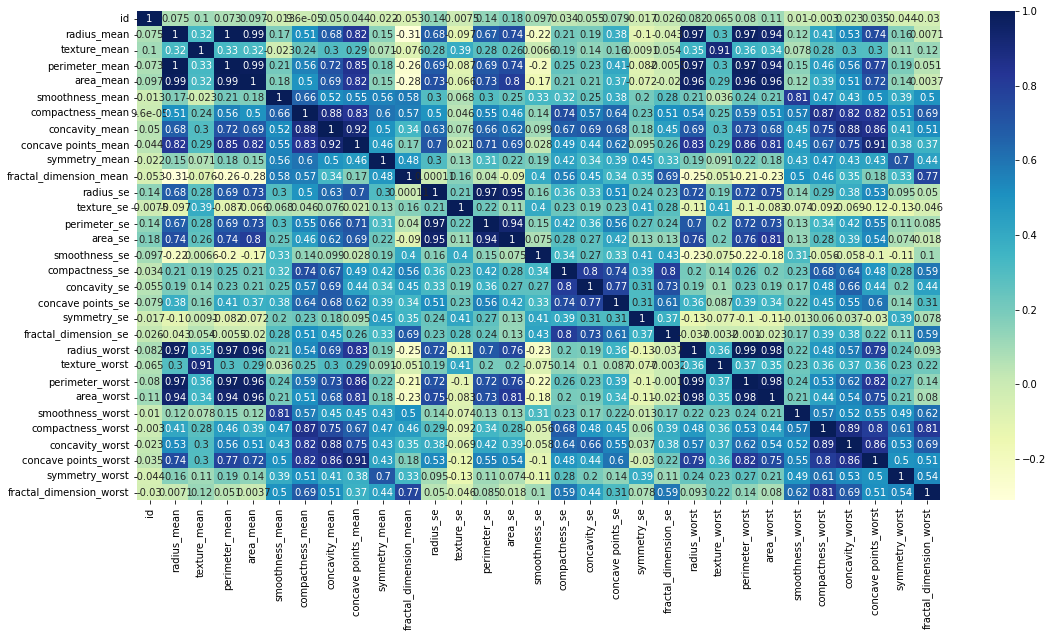

In [7]:
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(),annot = True, cmap ="YlGnBu")

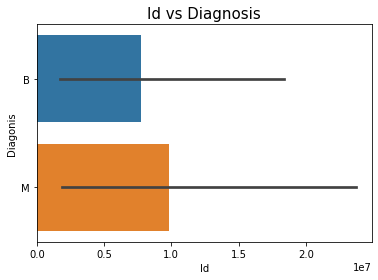

In [8]:
sns.barplot(x="id", y="diagnosis",data=data[160:190])
plt.title("Id vs Diagnosis",fontsize=15)
plt.xlabel("Id")
plt.ylabel("Diagonis")
plt.show()
plt.style.use("ggplot")

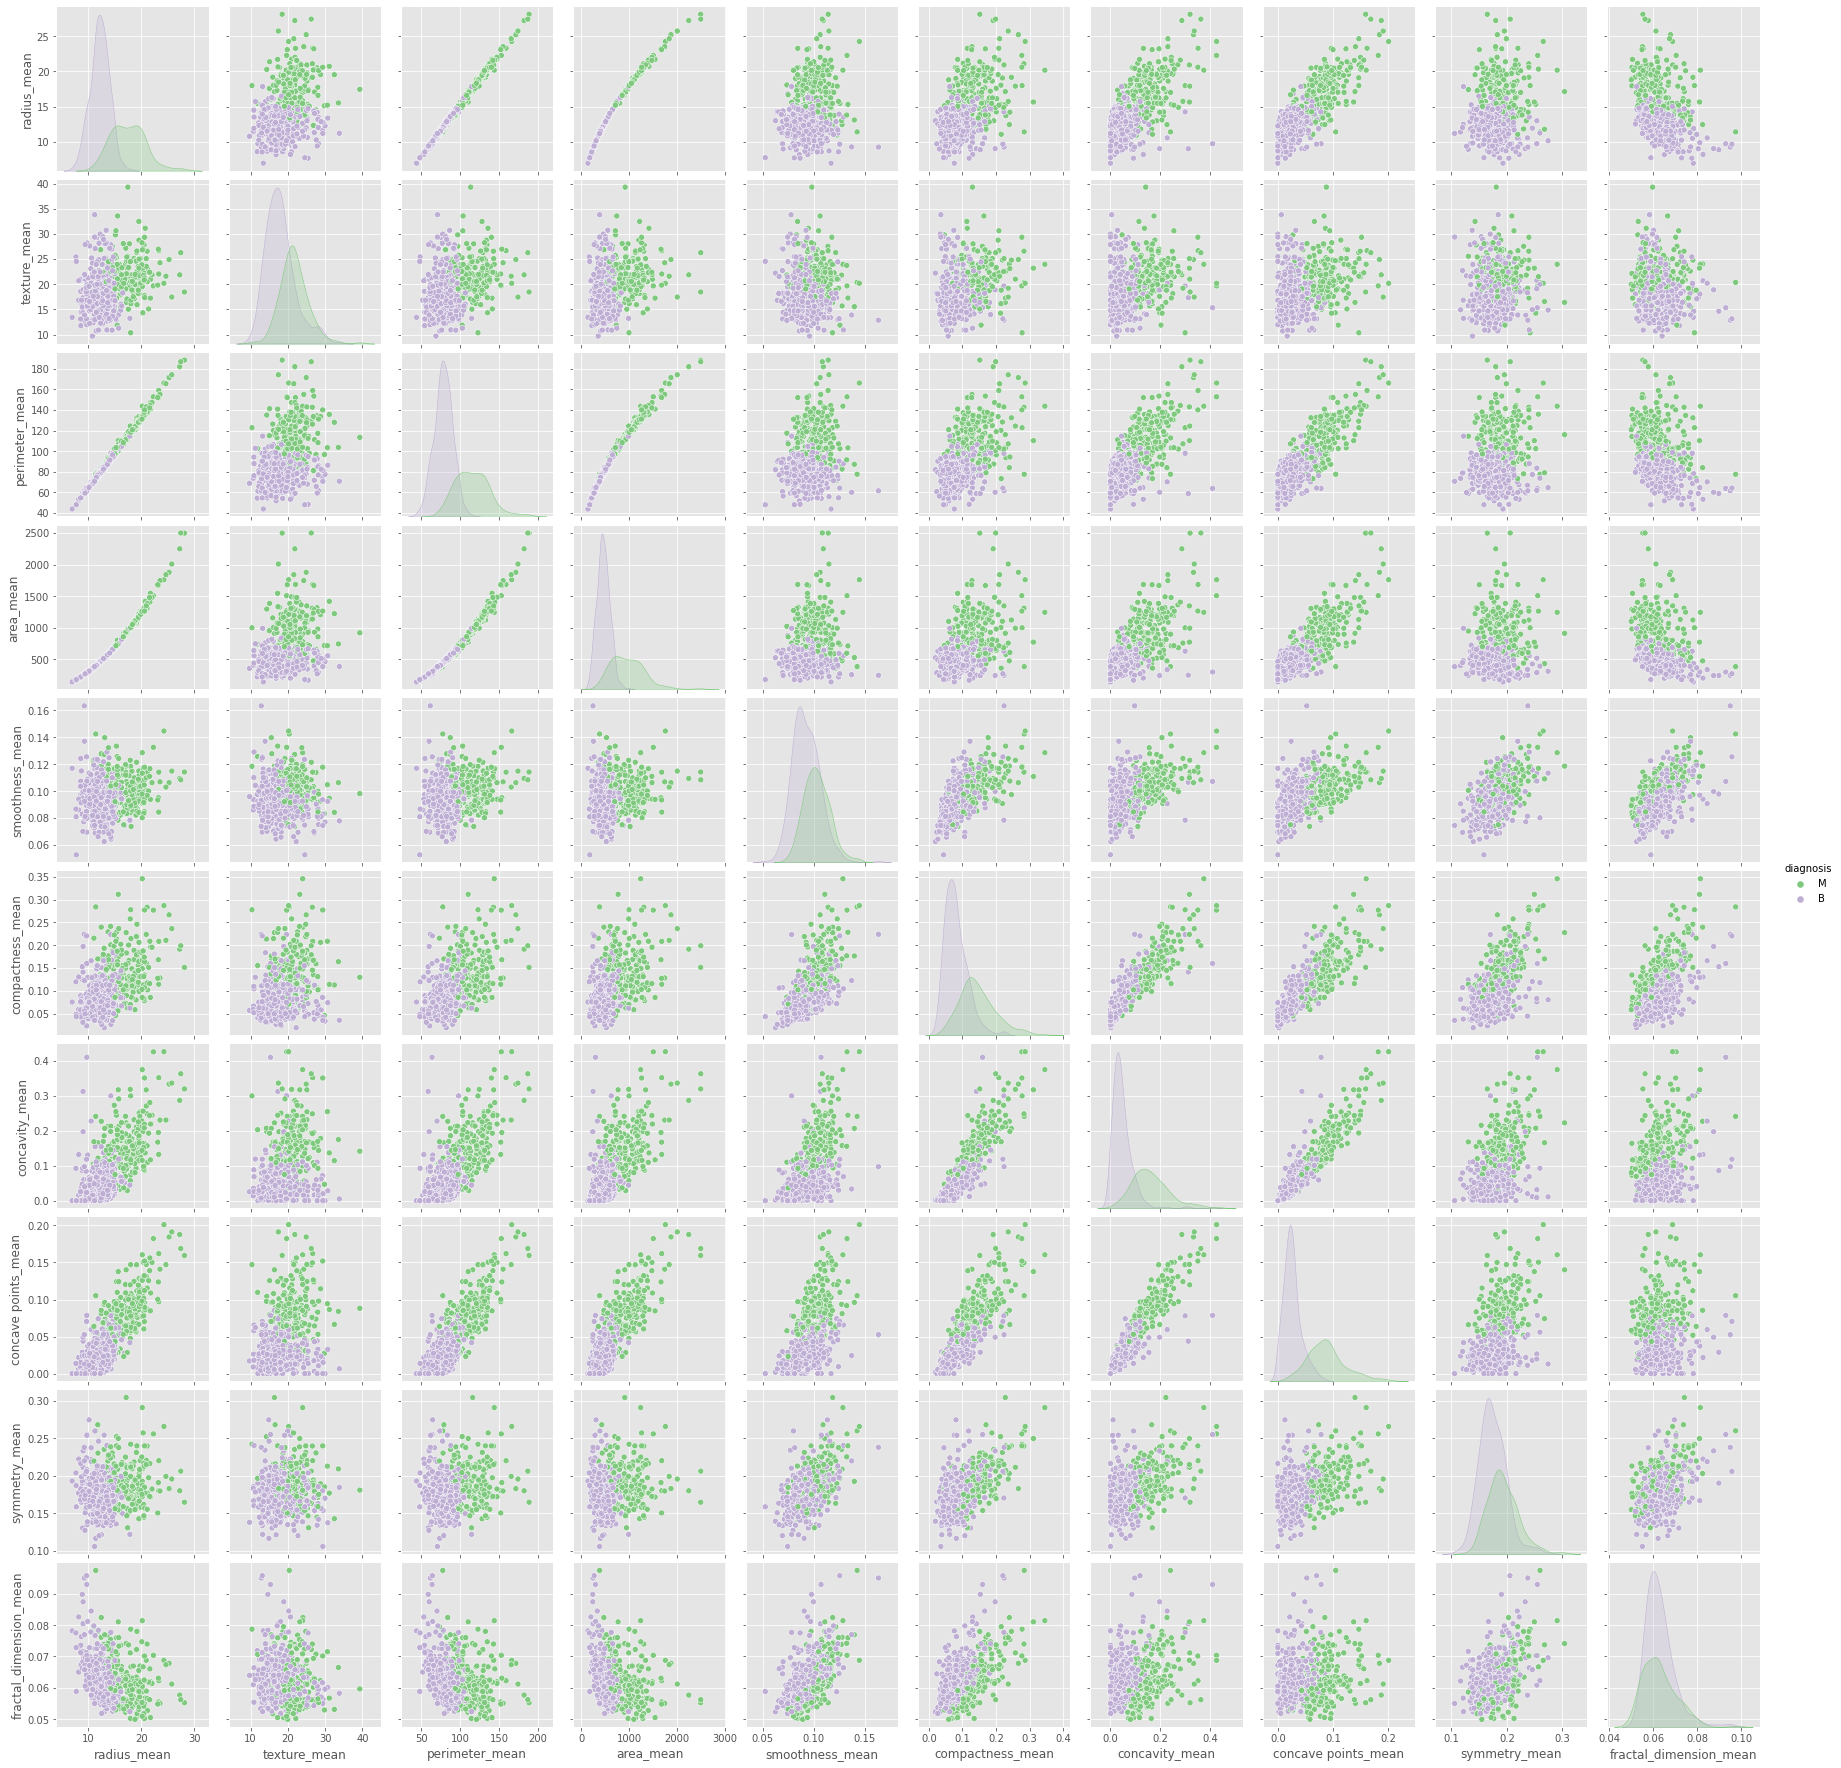

In [9]:
mean_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
sns.pairplot(data[mean_col],hue = 'diagnosis', palette='Accent')

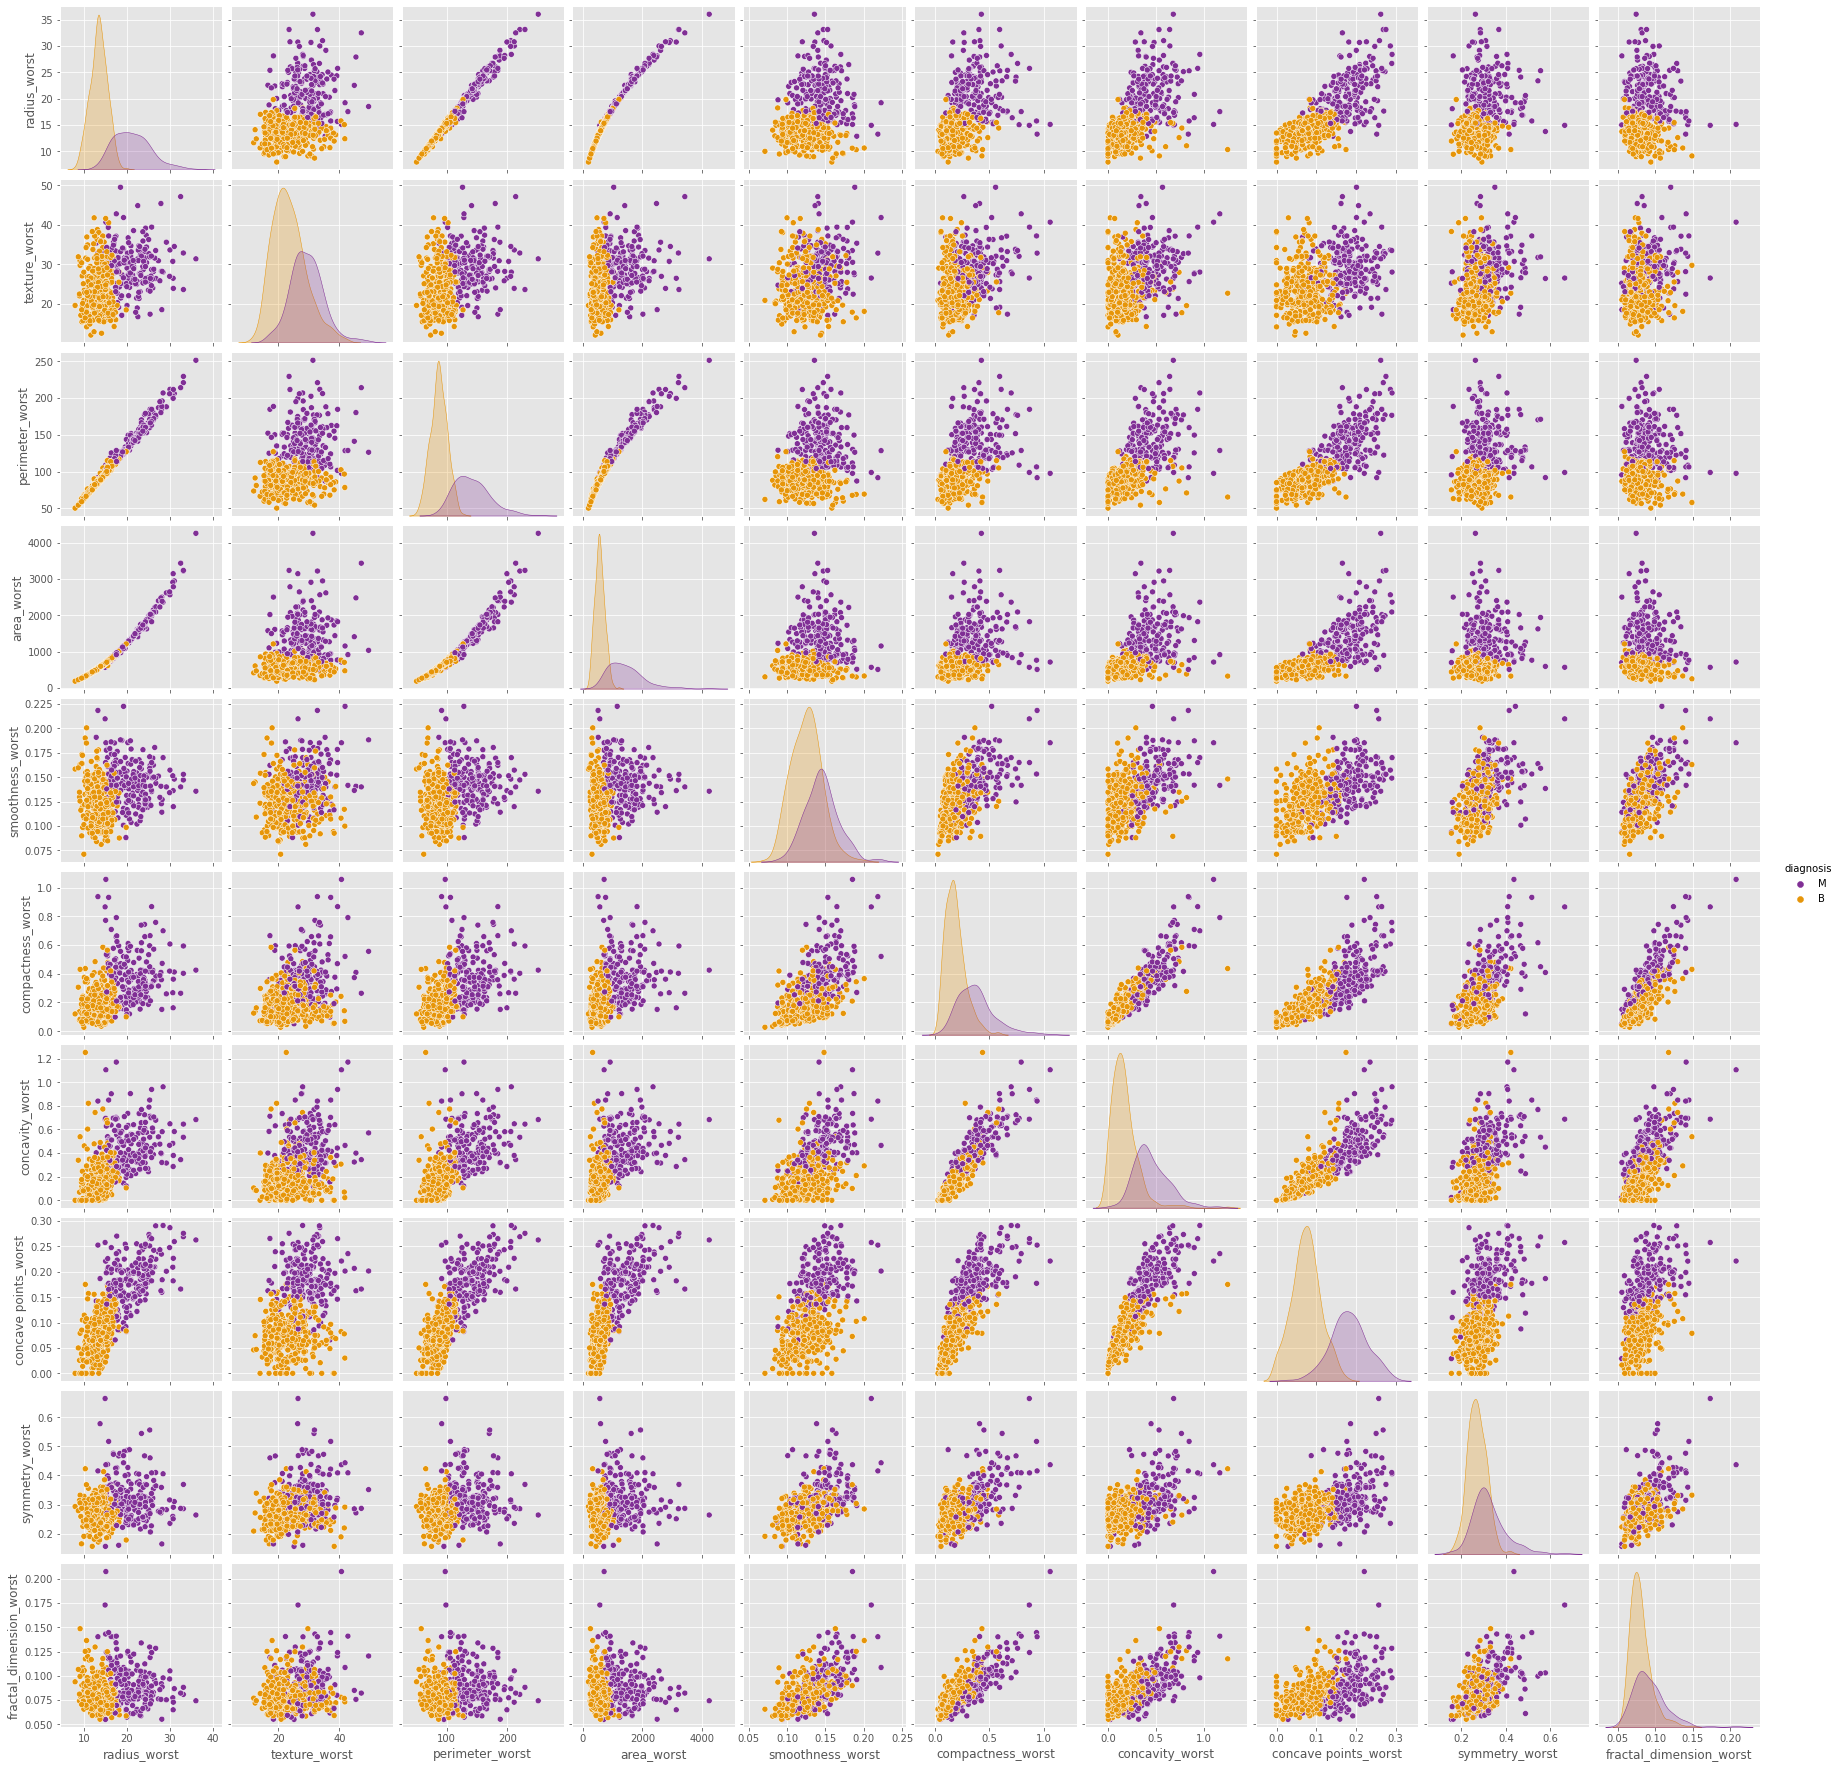

In [10]:
worst_col = ['diagnosis','radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst']
sns.pairplot(data[worst_col],hue = 'diagnosis', palette="CMRmap")

##**Train data**

In [11]:
x = data.drop(columns = 'diagnosis')
y = data['diagnosis']

In [12]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Predicting the best ML model

In [26]:
from lazypredict.Supervised import LazyClassifier

In [27]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [28]:
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 29/29 [00:01<00:00, 17.69it/s]


Accuracy  ...  Time Taken
Model                                    ...            
XGBClassifier                      0.98  ...        0.11
AdaBoostClassifier                 0.98  ...        0.20
LGBMClassifier                     0.98  ...        0.17
SVC                                0.97  ...        0.04
PassiveAggressiveClassifier        0.96  ...        0.02
ExtraTreesClassifier               0.96  ...        0.14
BaggingClassifier                  0.96  ...        0.08
LogisticRegression                 0.96  ...        0.04
CalibratedClassifierCV             0.96  ...        0.05
RidgeClassifierCV                  0.96  ...        0.03
RidgeClassifier                    0.96  ...        0.02
LinearDiscriminantAnalysis         0.96  ...        0.04
RandomForestClassifier             0.96  ...        0.27
QuadraticDiscriminantAnalysis      0.96  ...        0.02
KNeighborsClassifier               0.96  ...        0.02
NuSVC                              0.96  ...        0.04
SGDClassifier                      0.94  ...        0.03
LinearSVC                          0.94  ...        0.04
BernoulliNB                        0.93  ...        0.02
DecisionTreeClassifier             0.93  ...        0.02
Perceptron                         0.93  ...        0.02
NearestCentroid                    0.93  ...        0.03
LabelSpreading                     0.93  ...        0.04
LabelPropagation                   0.93  ...        0.04
GaussianNB                         0.91  ...        0.02
ExtraTreeClassifier                0.90  ...        0.01
DummyClassifier                    0.51  ...        0.01

[27 rows x 5 columns]

Best accuracy by XGBClassifier and worst by dummy classifier. will test these two

# **XGBClassifier**

In [38]:
from xgboost import XGBClassifier

In [39]:
xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)

[16:24:28] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:24:28] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='reg:linear', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
y_pred_xgb=xgb.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))
print("Training Score: ",xgb.score(x_train,y_train)*100)
print(xgb.score(x_test,y_test))

              precision    recall  f1-score   support

           B       0.96      0.97      0.96        67
           M       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[65  2]
 [ 3 44]]
Training Score:  97.8021978021978
0.956140350877193


In [60]:
print("Training Score: ",xgb.score(x_train,y_train)*100)

Training Score:  97.8021978021978


# **Dummy classifier**

In [44]:
from sklearn.dummy import DummyClassifier

In [45]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [46]:
dummy_clf.fit(x_train, y_train)

DummyClassifier(strategy='most_frequent')

In [48]:
y_pred_dummy=dummy_clf.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred_dummy))
print(confusion_matrix(y_test,y_pred_dummy))
print("Training Score: ",dummy_clf.score(x_train,y_train)*100)
print(dummy_clf.score(x_test,y_test))

              precision    recall  f1-score   support

           B       0.59      1.00      0.74        67
           M       0.00      0.00      0.00        47

    accuracy                           0.59       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.35      0.59      0.44       114

[[67  0]
 [47  0]]
Training Score:  63.73626373626373
0.5877192982456141


Good accuracy from XGBClassifier
Bad accuracy from dummyclassifier